In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pylttb import lttb 

In [2]:
root = '../data/raw/ECGDataDenoised'
files = os.listdir(root)
print(files[:10])

['MUSE_20180120_123813_67000.csv', 'MUSE_20180114_131501_69000.csv', 'MUSE_20180114_070252_15000.csv', 'MUSE_20180112_120955_24000.csv', 'MUSE_20180210_123937_02000.csv', 'MUSE_20180118_135213_14000.csv', 'MUSE_20180113_135458_69000.csv', 'MUSE_20180113_130206_88000.csv', 'MUSE_20180113_125418_88000.csv', 'MUSE_20180113_075147_58000.csv']


In [3]:
ecg = np.genfromtxt(os.path.join(root, files[0]), delimiter=',')
print(ecg[:5])

[[ 43.442    22.272     5.9621  -36.253    16.879    16.798    -6.0427
  -13.822    14.059    84.415    43.528    12.249  ]
 [ 46.238    18.719    -0.95161 -35.228    22.186    12.204   -11.898
  -16.513    11.482    81.686    48.689    25.06   ]
 [ 48.771    15.831    -6.9357  -34.502    26.75      8.2647  -17.081
  -19.498     8.0163   77.993    51.899    35.994  ]
 [ 50.145    13.677   -11.024   -33.708    29.588     5.3995  -21.059
  -22.868     3.2255   72.706    51.886    43.559  ]
 [ 49.114    11.457   -12.769   -31.832    29.901     3.4131  -23.565
  -26.456    -2.711    65.723    48.372    46.906  ]]


In [4]:
def plot_ecg(ecg):
    rows = ecg.shape[1]
    plt.figure(figsize=(15, 15))
    for i in range(rows):
        plt.subplot(rows, 1, i+1)
        plt.plot(ecg[:,i])

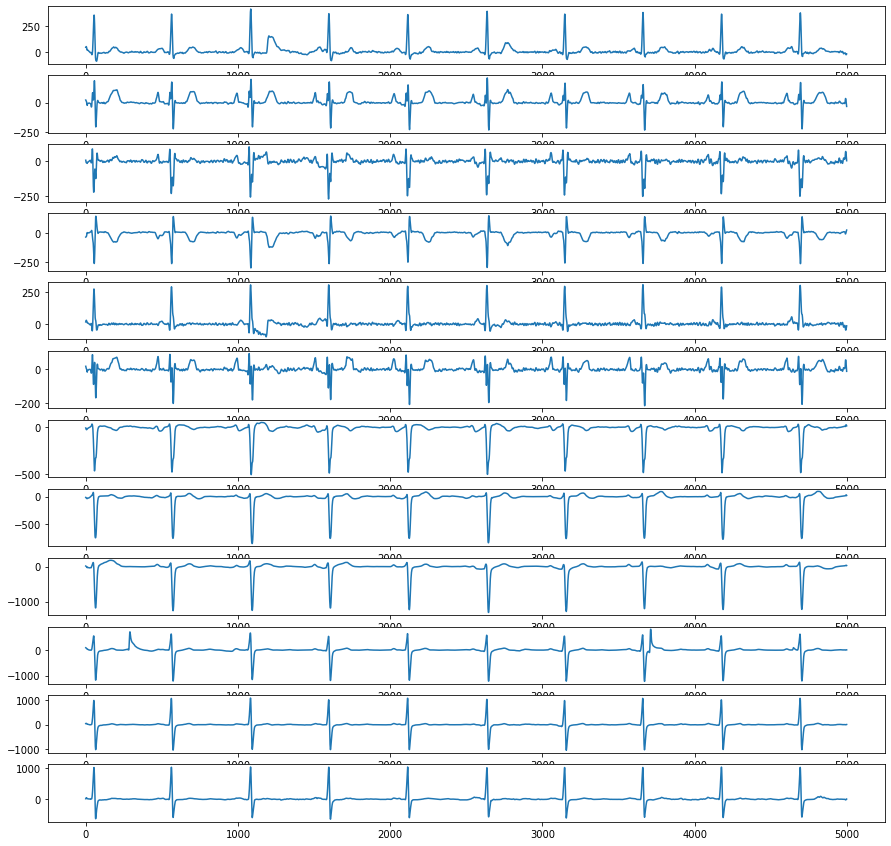

In [5]:
plot_ecg(ecg)

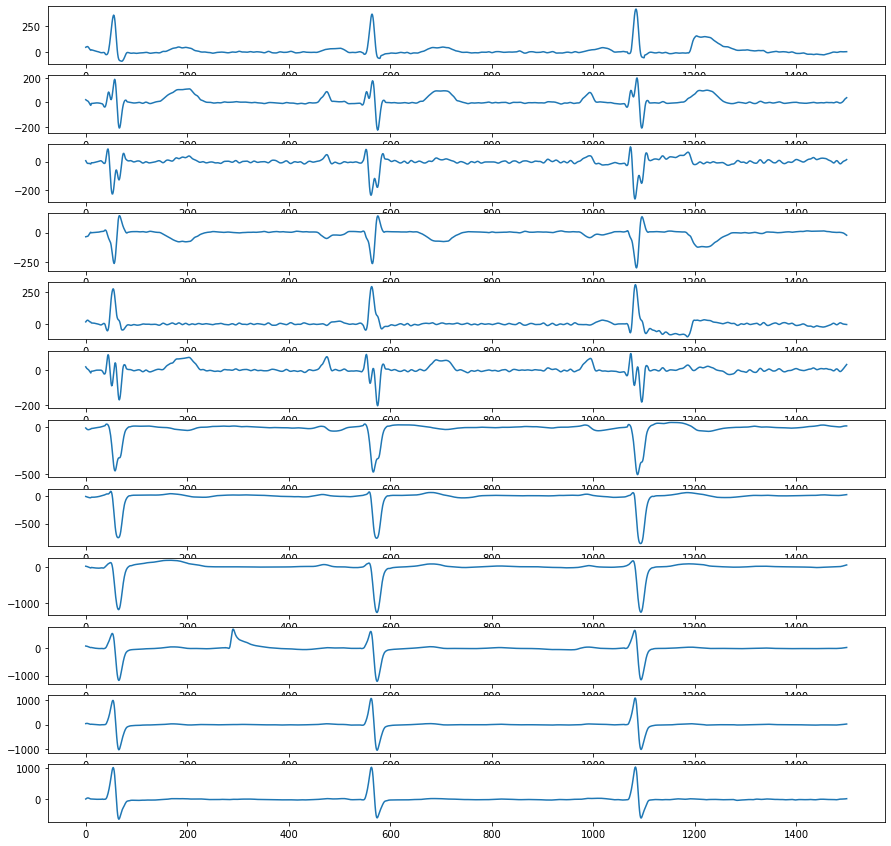

In [6]:
plot_ecg(ecg[:1500])

In [7]:
def downsample(ecg, threshold):
    index = np.arange(ecg.shape[0])
    ecg_sampled = []
    for i in range(ecg.shape[1]):
        down_x, down_y = lttb(index, ecg[:,i], threshold)
        ecg_sampled.append(down_y)

    return np.vstack(ecg_sampled).T

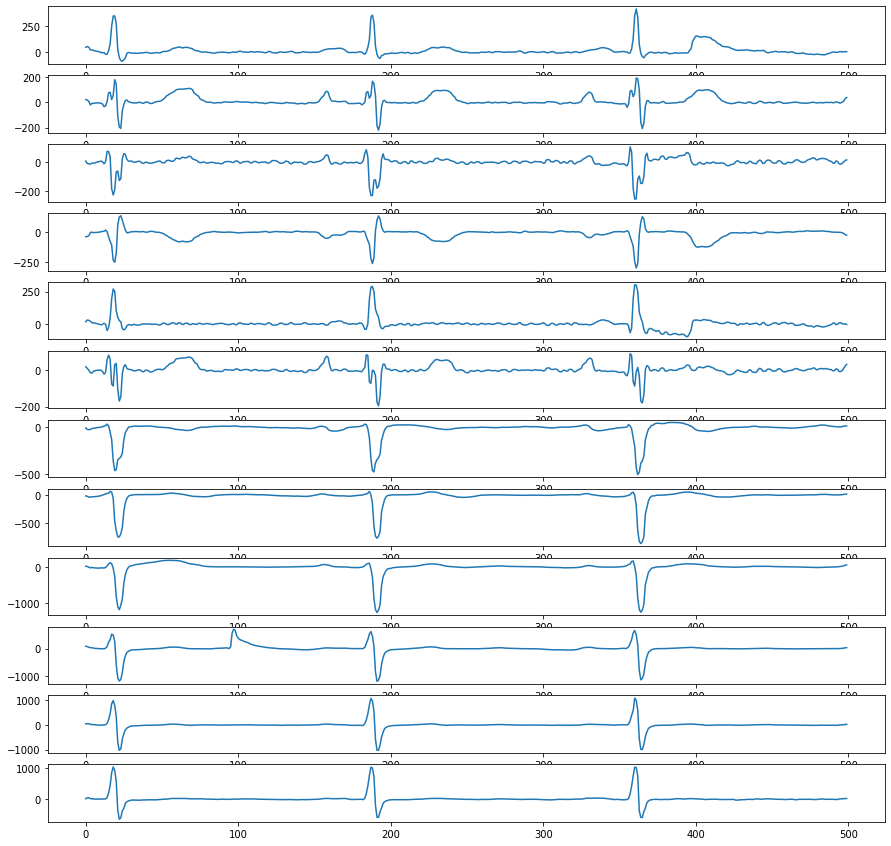

In [8]:
ecg_subset = ecg[:1500]
plot_ecg(downsample(ecg_subset, 500))

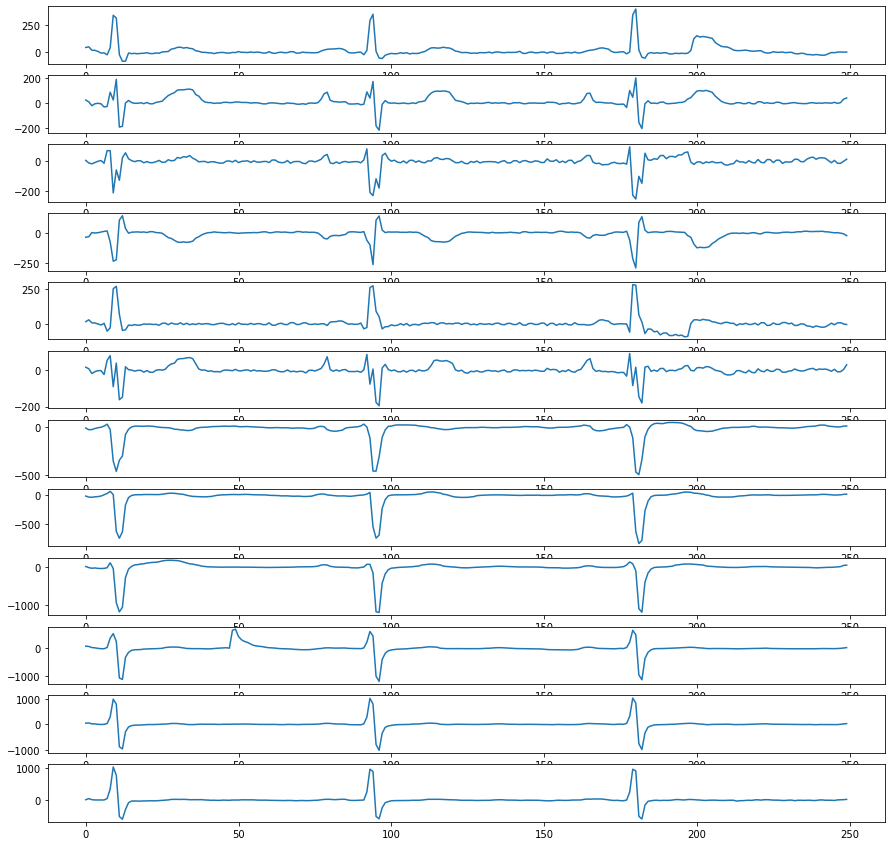

In [9]:
ecg_subset = ecg[:1500]
plot_ecg(downsample(ecg_subset, 250))

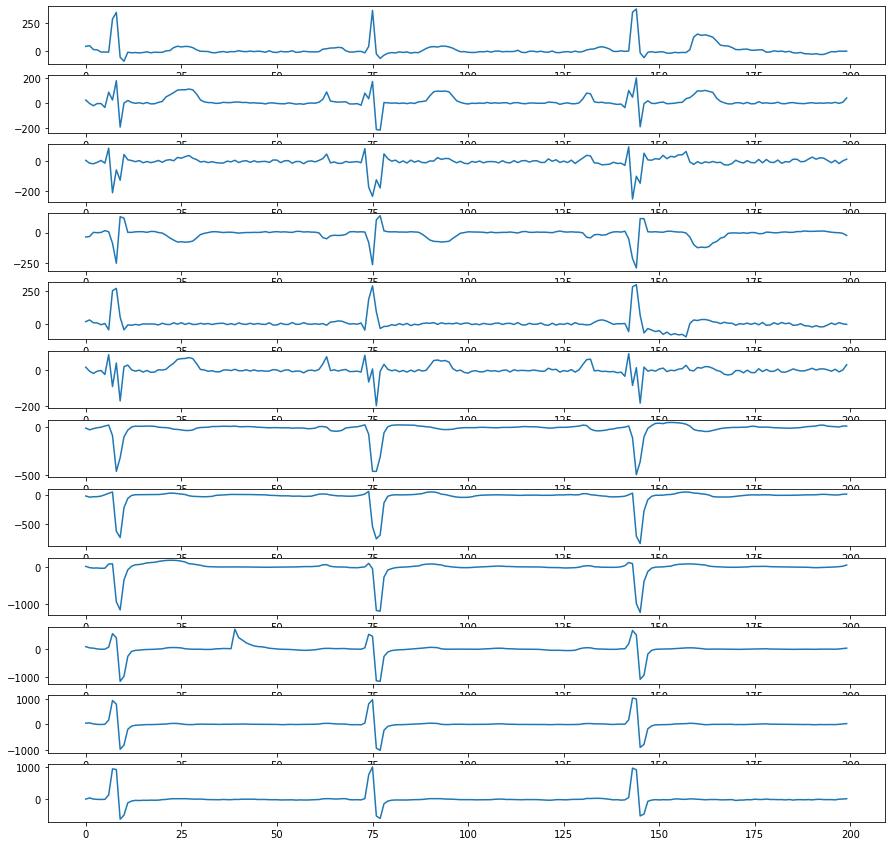

In [10]:
ecg_subset = ecg[:1500]
plot_ecg(downsample(ecg_subset, 200))

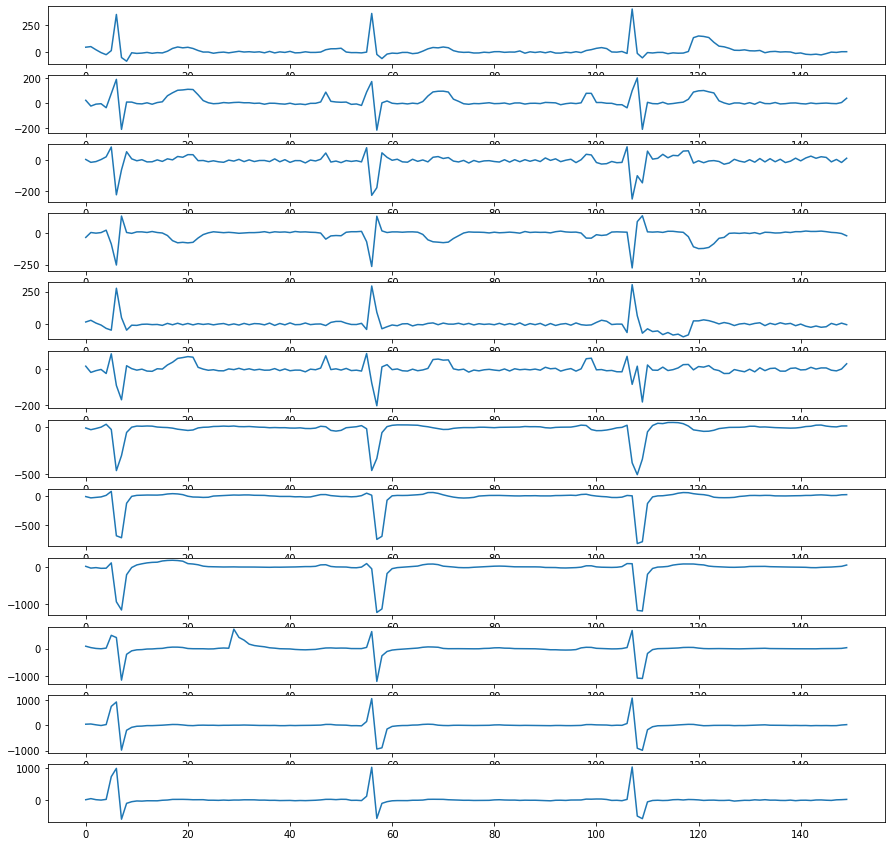

In [11]:
ecg_subset = ecg[:1500]
plot_ecg(downsample(ecg_subset, 150))

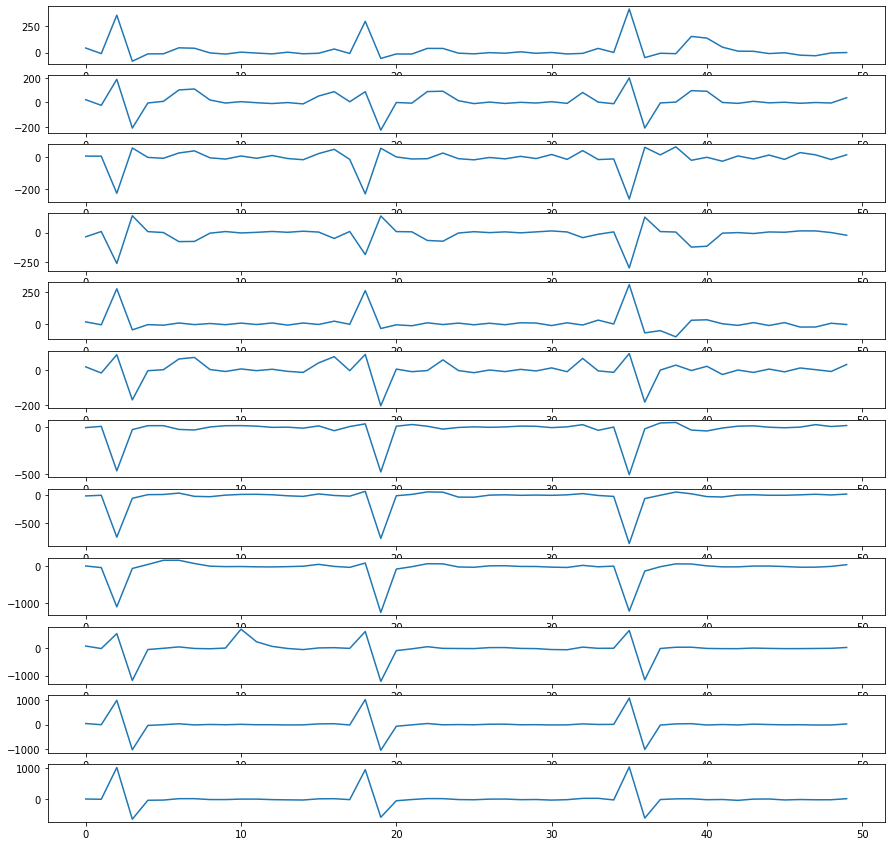

In [12]:
ecg_subset = ecg[:1500]
plot_ecg(downsample(ecg_subset, 50))

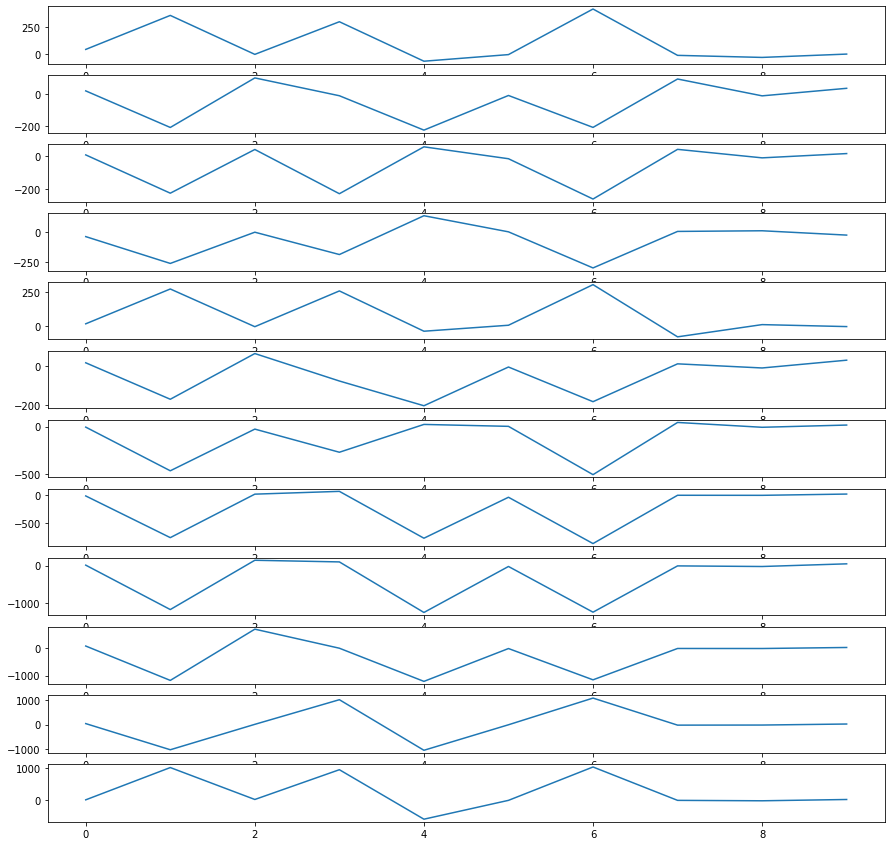

In [13]:
ecg_subset = ecg[:1500]
plot_ecg(downsample(ecg_subset, 10))

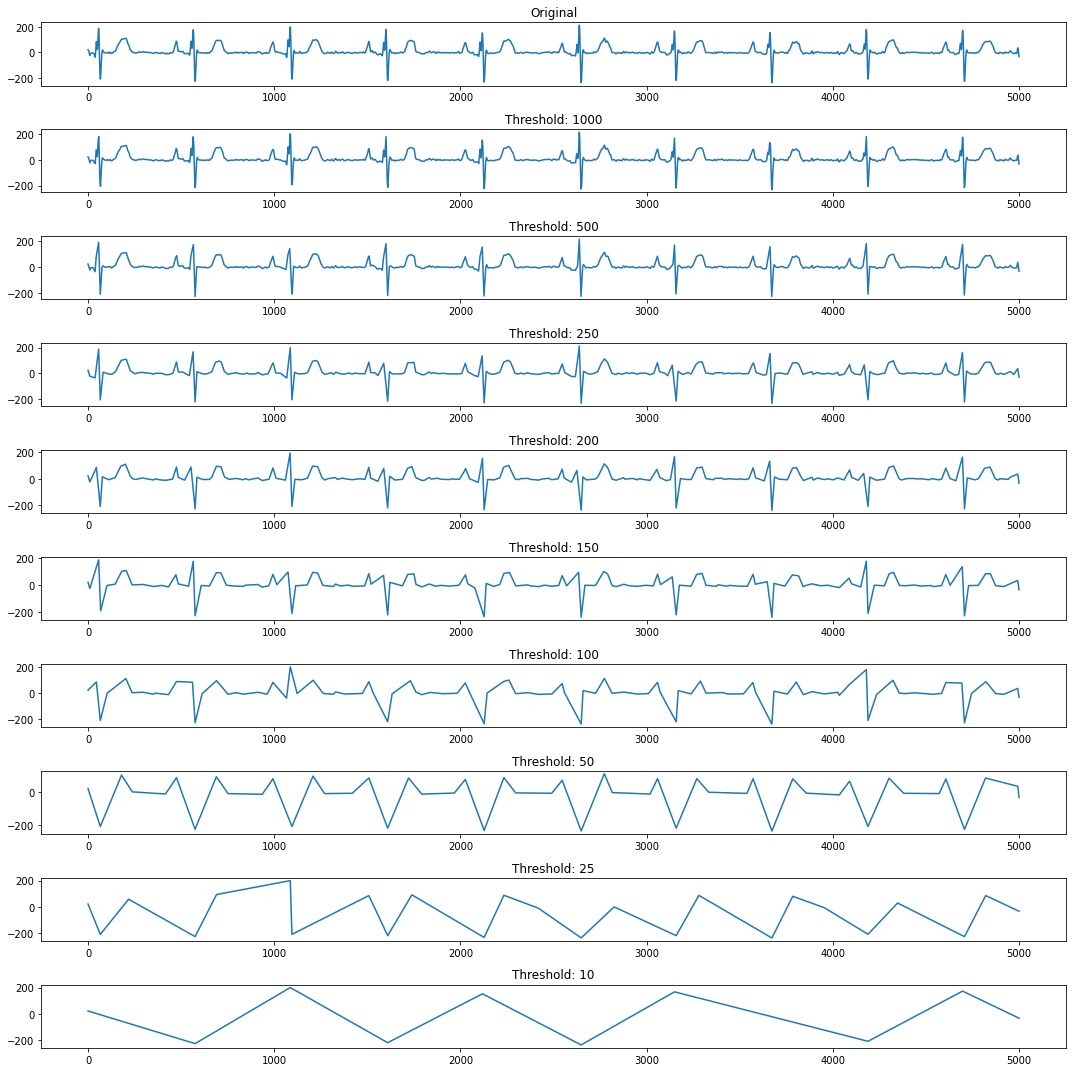

In [35]:
sample_rate = [1000, 500, 250, 200, 150, 100, 50, 25, 10]

ecg_temp = []
fig = plt.figure(figsize=(15, 15))
rows = len(sample_rate) + 1
i = 1

plt.subplot(rows, 1, 1)
plt.plot(ecg[:, 1])
plt.title('Original')

for s in sample_rate:
    index = np.arange(ecg.shape[0])
    down_x, down_y = lttb(index, ecg[:, 1], s)
    ecg_temp.append(down_y)
    
    plt.subplot(rows, 1, i+1)
    plt.plot(down_x, down_y)
    plt.title('Threshold: {}'.format(s))
    i += 1
    
fig.tight_layout()

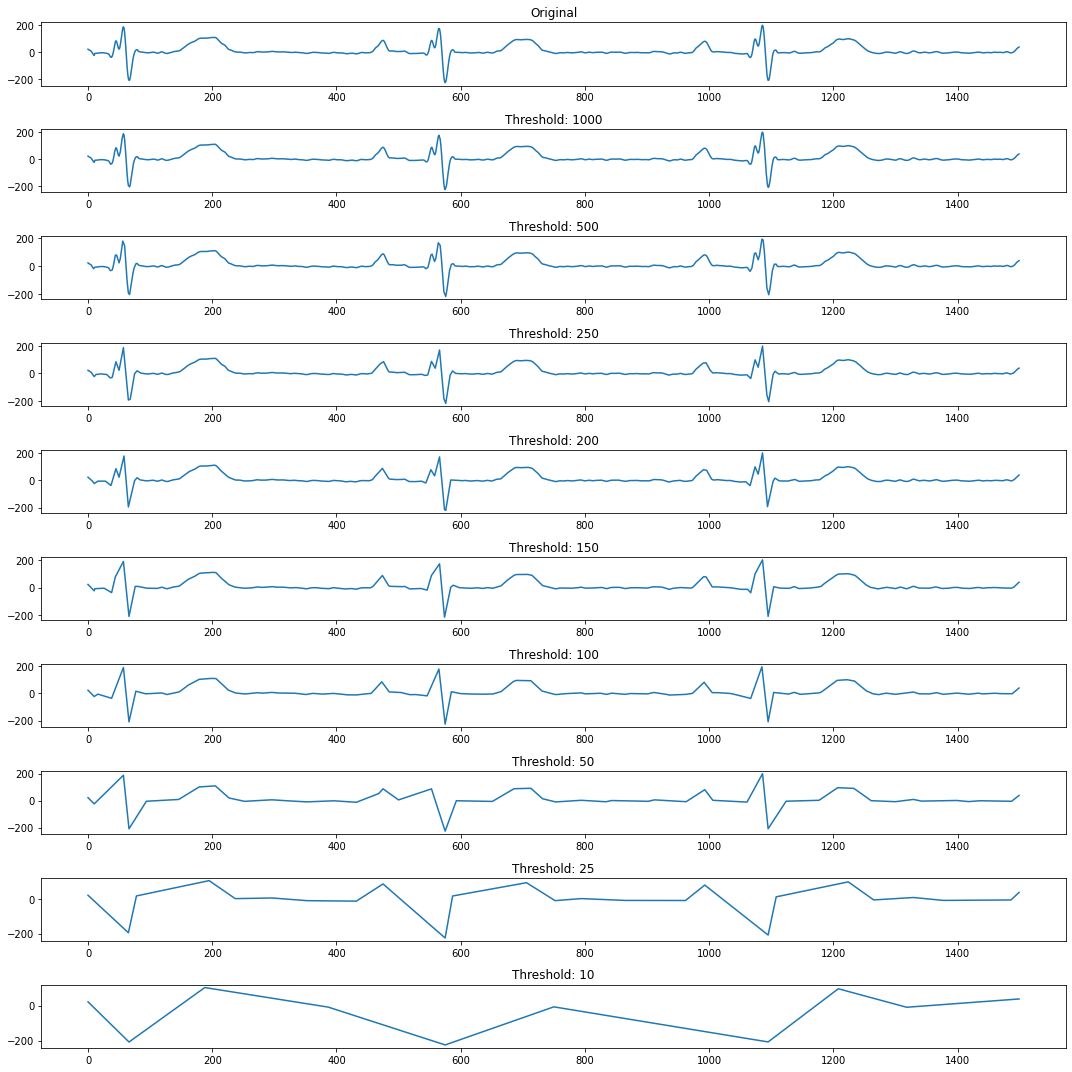

In [36]:
sample_rate = [1000, 500, 250, 200, 150, 100, 50, 25, 10]

fig = plt.figure(figsize=(15, 15))
rows = len(sample_rate) + 1
i = 1

plt.subplot(rows, 1, 1)
plt.plot(ecg_subset[:, 1])
plt.title('Original')

for s in sample_rate:
    index = np.arange(ecg_subset.shape[0])
    down_x, down_y = lttb(index, ecg_subset[:, 1], s)
    
    plt.subplot(rows, 1, i+1)
    plt.plot(down_x, down_y)
    plt.title('Threshold: {}'.format(s))
    i += 1
    
fig.tight_layout()